In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")






#from sklearn.neighbors import  KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#import xgboost
#from xgboost import XGBClassifier

#from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
#from sklearn.preprocessing import StandardScaler, LabelEncoder
#from sklearn.pipeline import make_pipeline
# from sklearn.naive_bayes import GaussianNB

# from sklearn.svm import SVC

# from sklearn.linear_model import LogisticRegression

# from sklearn.ensemble import RandomForestClassifier

# import xgboost as xgb



### Read data

In [8]:
data_path = 'C:/Users/Harshal Joshi/OneDrive/Desktop/Crop Dataset/Crop_Dataset.csv'
data = pd.read_csv(data_path)
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Basic EDA

In [9]:
data.size

17600

In [10]:
data.shape

(2200, 8)

In [11]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
labels = data['label'].unique()
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

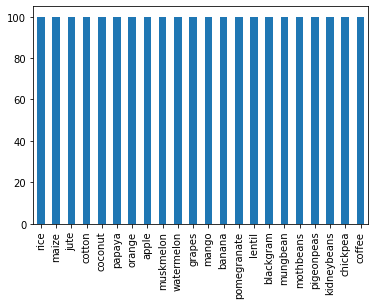

In [15]:
data['label'].value_counts().plot(kind='bar')
plt.show()

In [16]:
columns = data.columns
columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

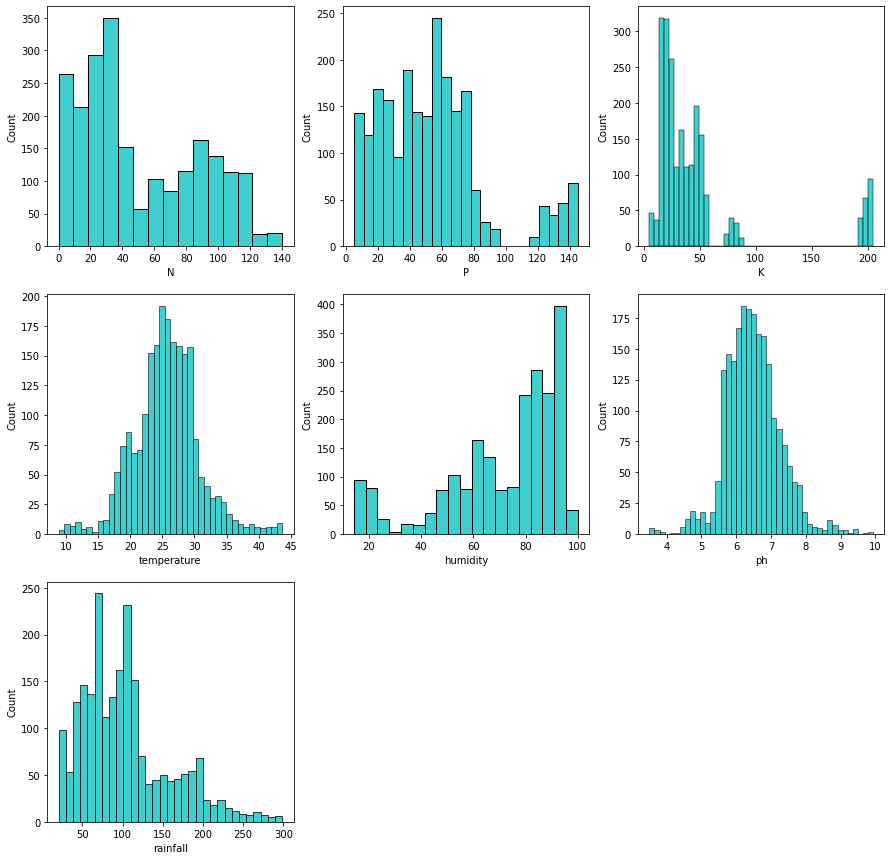

In [17]:
columns = data.columns[:-1]
plt.figure(figsize=(15,15))
i = 1
for column in columns:
    plt.subplot(3,3,i)
    sns.histplot(data[column], color = 'c')
    i += 1
    

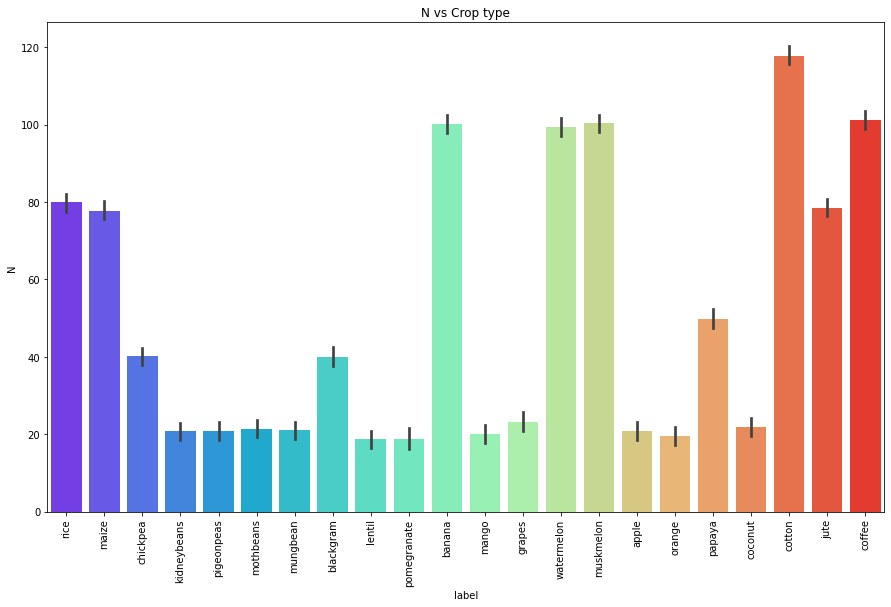

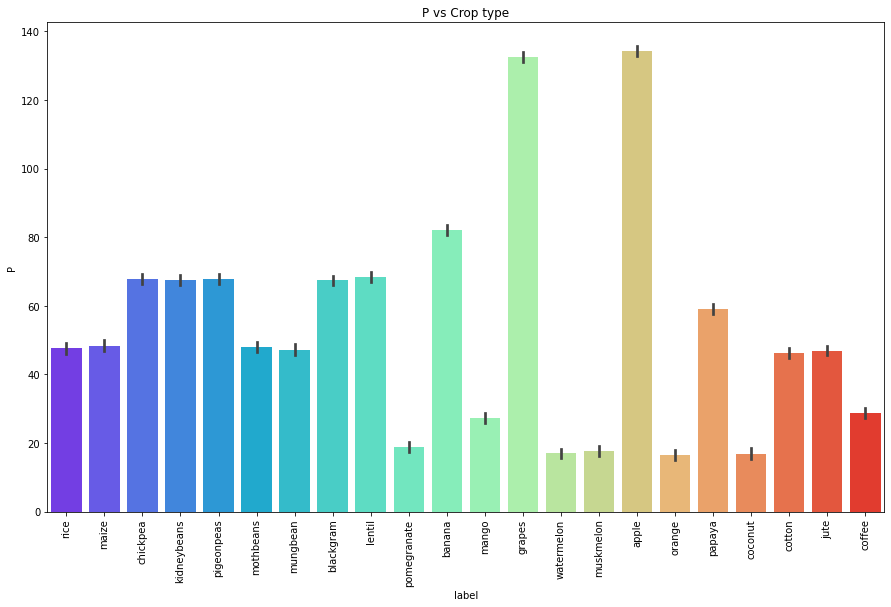

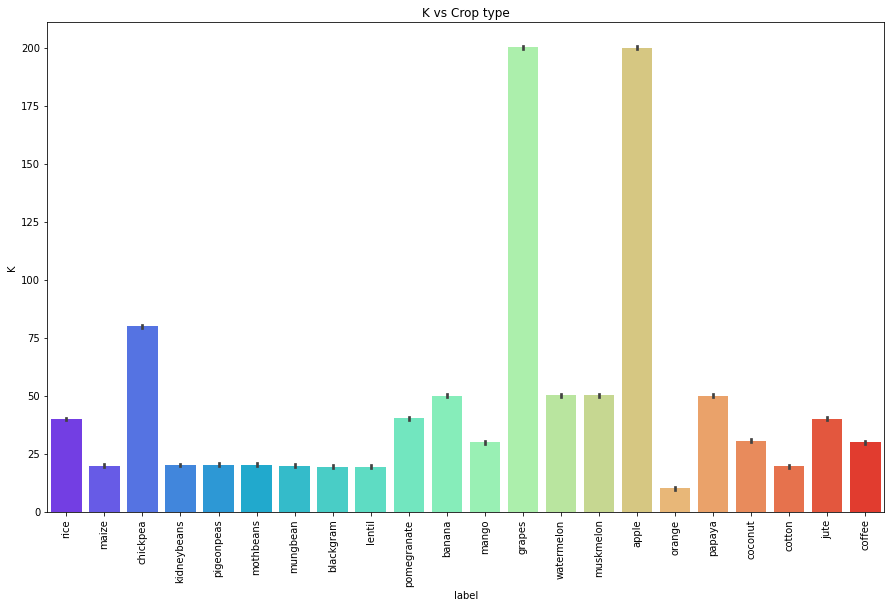

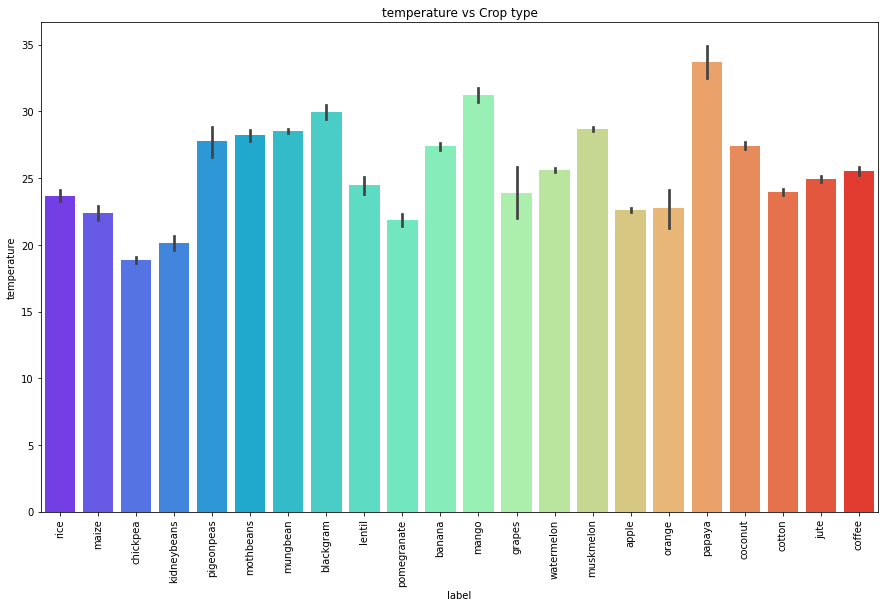

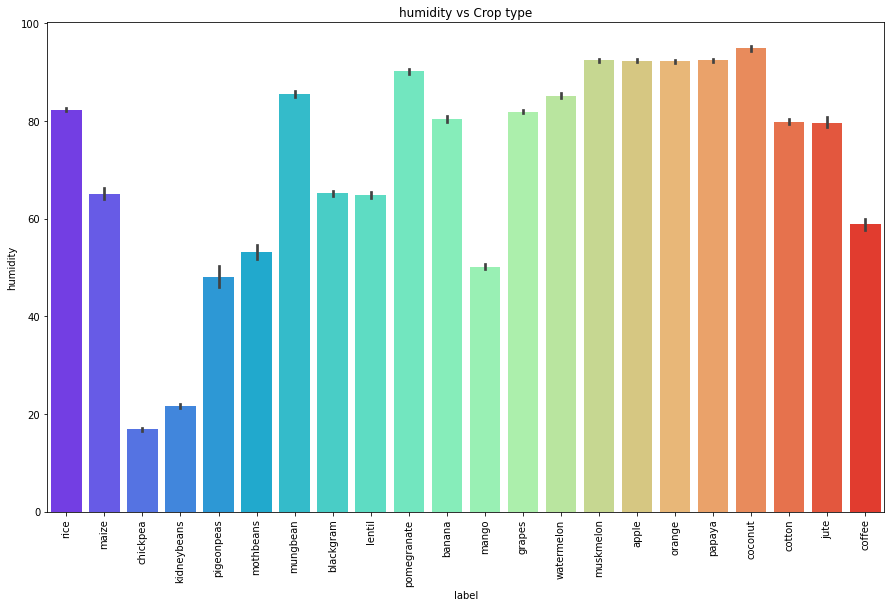

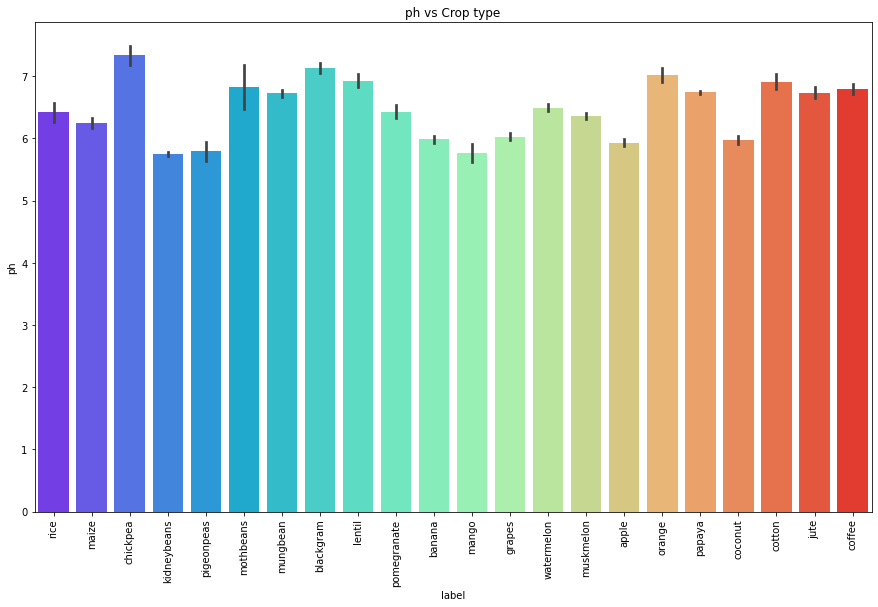

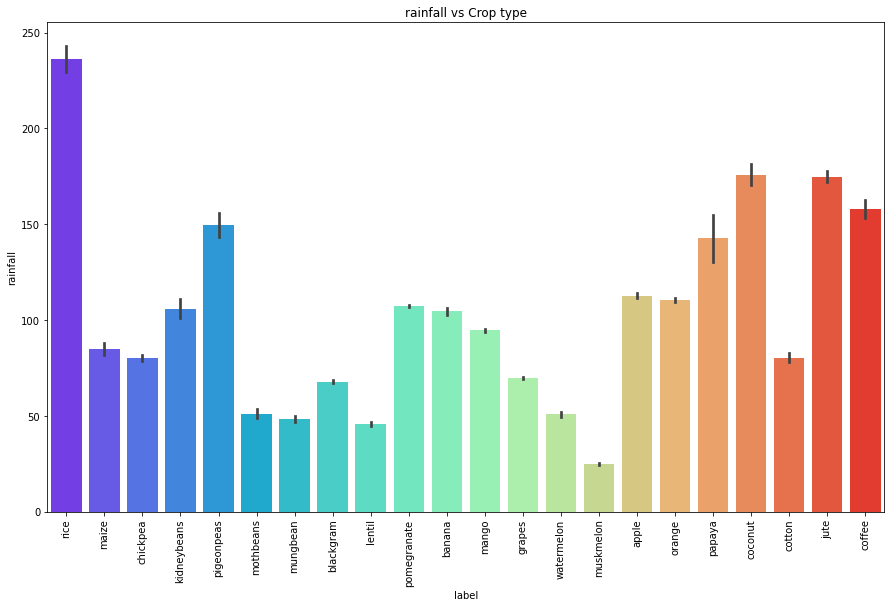

In [18]:
for column in columns:
    plt.figure(figsize= (15,9))
    sns.barplot(x = 'label', y = column, data = data, palette = 'rainbow')
    plt.title(f'{column} vs Crop type')
    plt.xticks(rotation = 90)
    plt.show()
    continue

### Dependent and Independent Variables 

In [19]:
features = data[['N', 'P','K','temperature', 'humidity']]
target = data['label']

In [20]:
features

,N,P,K,temperature,humidity
0,90,42,43,20.879744,82.002744
1,85,58,41,21.770462,80.319644
2,60,55,44,23.004459,82.320763
3,74,35,40,26.491096,80.158363
4,78,42,42,20.130175,81.604873
...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269
2196,99,15,27,27.417112,56.636362
2197,118,33,30,24.131797,67.225123
2198,117,32,34,26.272418,52.127394


In [21]:
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

### Training and testing data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.20, random_state = 22)

In [23]:
X_train

,N,P,K,temperature,humidity
1279,38,135,203,41.361063,82.797830
845,24,61,17,22.637142,65.445449
1483,83,15,49,28.927059,91.393568
831,3,63,16,24.380419,61.184582
1734,34,61,49,28.129715,93.321074
...,...,...,...,...,...
491,4,69,19,19.251001,47.703518
1382,101,11,51,25.507370,84.243402
356,31,79,25,23.188644,22.310455
812,3,69,23,28.674088,63.188330


In [24]:
X_test

,N,P,K,temperature,humidity
2030,69,57,35,24.307486,78.543410
454,5,56,24,24.807102,45.011100
1657,12,20,10,24.451328,93.105277
1235,32,129,201,16.362519,83.004716
1694,6,13,9,34.514240,90.561515
...,...,...,...,...,...
1949,111,50,15,25.168201,80.303518
1258,21,139,201,19.364255,83.360940
2049,100,56,40,26.389054,83.312403
1106,19,21,34,30.015926,53.192124


In [25]:
Y_train

1279         grapes
845          lentil
1483      muskmelon
831          lentil
1734         papaya
           ...     
491      pigeonpeas
1382     watermelon
356     kidneybeans
812          lentil
2180         coffee
Name: label, Length: 1760, dtype: object

In [26]:
Y_test

2030          jute
454     pigeonpeas
1657        orange
1235        grapes
1694        orange
           ...    
1949        cotton
1258        grapes
2049          jute
1106         mango
660       mungbean
Name: label, Length: 440, dtype: object

## Prediction Models

### 1. Decision Tree algorithm

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
DecisionTree = DecisionTreeClassifier()

In [70]:
DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [71]:
from sklearn import tree

[Text(490.2875339673913, 531.2454545454545, 'X[4] <= 27.685\ngini = 0.954\nsamples = 1760\nvalue = [79, 79, 78, 78, 78, 79, 79, 81, 80, 84, 83, 75\n84, 85, 73, 81, 80, 92, 74, 76, 83, 79]'),
 Text(414.140625, 506.53636363636366, 'X[2] <= 50.0\ngini = 0.499\nsamples = 162\nvalue = [0, 0, 0, 78, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(402.0101902173913, 481.82727272727277, 'gini = 0.0\nsamples = 84\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(426.2710597826087, 481.82727272727277, 'gini = 0.0\nsamples = 78\nvalue = [0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(566.4344429347826, 506.53636363636366, 'X[2] <= 125.0\ngini = 0.95\nsamples = 1598\nvalue = [79, 79, 78, 0, 78, 79, 79, 81, 80, 0, 83, 75\n84, 85, 73, 81, 80, 92, 74, 76, 83, 79]'),
 Text(450.53192934782606, 481.82727272727277, 'X[4] <= 70.653\ngini = 0.944\nsamples = 1438\nvalue = [0, 79, 78, 0, 78, 79, 79, 0, 80, 0, 83, 75, 84\n85, 73,

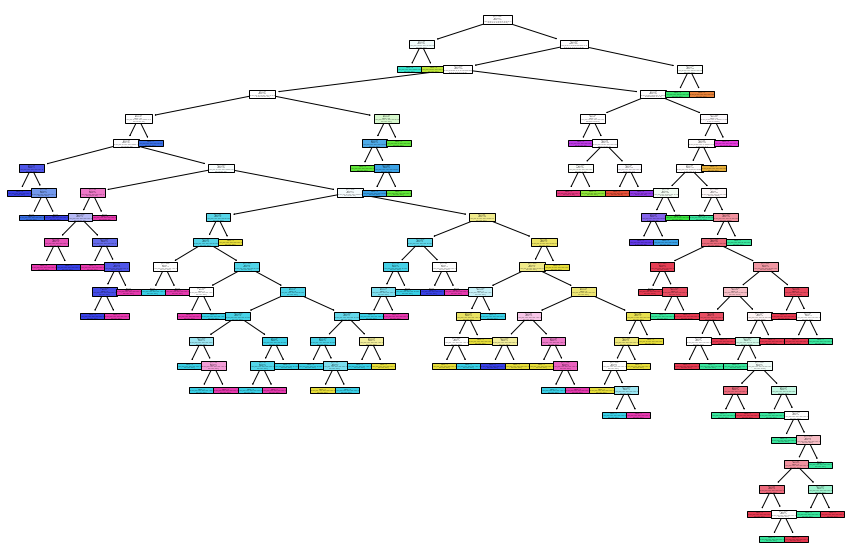

In [72]:
plt.figure(figsize = (15,10))
tree.plot_tree(DecisionTree, filled = True)

In [73]:
Y_pred = DecisionTree.predict(X_test)

In [74]:
Y_pred

array(['jute', 'mothbeans', 'orange', 'grapes', 'orange', 'grapes',
       'papaya', 'orange', 'watermelon', 'coffee', 'watermelon',
       'muskmelon', 'mungbean', 'chickpea', 'mothbeans', 'jute',
       'pomegranate', 'cotton', 'mango', 'watermelon', 'cotton', 'coffee',
       'banana', 'muskmelon', 'mungbean', 'rice', 'watermelon',
       'blackgram', 'watermelon', 'pigeonpeas', 'maize', 'watermelon',
       'blackgram', 'mungbean', 'pomegranate', 'lentil', 'pigeonpeas',
       'grapes', 'coconut', 'pomegranate', 'kidneybeans', 'mango',
       'orange', 'kidneybeans', 'banana', 'chickpea', 'blackgram',
       'blackgram', 'pomegranate', 'pigeonpeas', 'grapes', 'pomegranate',
       'chickpea', 'maize', 'watermelon', 'banana', 'mothbeans', 'apple',
       'coconut', 'pigeonpeas', 'jute', 'pomegranate', 'muskmelon',
       'mungbean', 'coffee', 'blackgram', 'maize', 'watermelon',
       'pigeonpeas', 'grapes', 'chickpea', 'mungbean', 'orange', 'jute',
       'jute', 'coconut', 'waterm

In [75]:
from sklearn.metrics import accuracy_score, classification_report

In [76]:
accuracy = accuracy_score(Y_pred, Y_test)
accuracy

0.95

In [77]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        21
   blackgram       0.77      0.81      0.79        21
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        22
      coffee       0.95      1.00      0.98        20
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.80      0.84      0.82        19
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.82      0.82      0.82        17
       maize       1.00      0.93      0.96        27
       mango       1.00      1.00      1.00        16
   mothbeans       0.80      0.86      0.83        14
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [104]:
data = np.array([[32,73, 81, 20, 15]])
prediction = DecisionTree.predict(data)
print(prediction)

['chickpea']


In [65]:
pickle.dump(DecisionTree, open('decisiontree.pkl', 'wb'))

In [43]:
model = pickle.load(open('decisiontree.pkl','rb'))

In [44]:
model.predict(data)

array(['coffee'], dtype=object)

In [82]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,Y_train)

Y_pred = NaiveBayes.predict(X_test)
test = np.array(X_test.iloc[1,:])
test = test.reshape(1,-1)
print(NaiveBayes.predict(test))
x = metrics.accuracy_score(Y_test, Y_pred)


print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

['mothbeans']
Naive Bayes's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        21
   blackgram       0.72      0.95      0.82        22
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.88      0.70      0.78        20
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.80      0.71      0.75        17
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        16
   mothbeans       0.80      0.80      0.80        15
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        19
      orange       1

In [83]:
NaiveBayes.predict([[107,34,32,26,66]])

array(['coffee'], dtype='<U11')

In [105]:
pickle.dump(NaiveBayes, open('naivebayes.pkl', 'wb'))

In [106]:
model = pickle.load(open('decisiontree.pkl','rb'))

In [107]:
model.predict(data)

array(['chickpea'], dtype=object)

In [89]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,Y_train)

Y_pred = LogReg.predict(X_test)

x = metrics.accuracy_score(Y_test, Y_pred)

print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Y_test, Y_pred))

Logistic Regression's Accuracy is:  0.8454545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       0.95      0.95      0.95        21
   blackgram       0.64      0.73      0.68        22
    chickpea       1.00      1.00      1.00        22
     coconut       0.92      1.00      0.96        22
      coffee       0.95      1.00      0.98        21
      cotton       0.88      1.00      0.93        21
      grapes       1.00      1.00      1.00        19
        jute       0.68      0.65      0.67        20
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.59      0.59      0.59        17
       maize       1.00      0.84      0.91        25
       mango       0.94      1.00      0.97        16
   mothbeans       0.31      0.27      0.29        15
    mungbean       0.96      1.00      0.98        27
   muskmelon       0.62      0.53      0.57        19
      orange       1.00   

In [108]:
pickle.dump(LogReg, open('logreg.pkl', 'wb'))

In [109]:
model = pickle.load(open('logreg.pkl','rb'))

In [110]:
model.predict(data)

array(['chickpea'], dtype=object)

In [98]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

Y_pred = RF.predict(X_test)

x = metrics.accuracy_score(Y_test, Y_pred)
print("RF's Accuracy is: ", x)

print(classification_report(Y_test,Y_pred))

RF's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        21
   blackgram       0.79      0.86      0.83        22
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.93      0.70      0.80        20
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.81      0.76      0.79        17
       maize       0.96      1.00      0.98        25
       mango       1.00      1.00      1.00        16
   mothbeans       0.87      0.87      0.87        15
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        20
   

In [111]:
pickle.dump(RF,open('randomforest.pkl', 'wb'))

In [112]:
model = pickle.load(open('randomforest.pkl', 'rb'))

In [113]:
model.predict(data)

array(['chickpea'], dtype=object)